<font size="+3">Solution on Association Rules</font>

BAS 474

Charles Liu

In [1]:
library(arules)
library(arulesViz)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




## Towards a Recommendation Engine for Music

The file `musiclikesmod.csv` contains information on users of last.fm (https://www.last.fm/), an online service that lets you stream music.  It also makes recommendations on what songs you might like based on your listening history (and that of your friends, if you share data).  By setting up the data appropriately, we can perform a "market basket analysis" to determine what combinations of artists are often enjoyed by the same listener.

To convert this into a market basket analysis problem, we will treat each listener as "cart".  Each listener has a list of bands they like, and these bands can be thought of as "items in the cart".  Perhaps association rules exist like "If a listener likes Lady Gaga and Kelly Clarkson, then they may also like Katy Perry".

In the data (which comes from 2011, so think of the music scene back then), there are 1821 "carts" (listeners) each of which contains one or more of 2459 unique items (bands).  Let's see what we can learn about listening habits!

Run the following code (making sure this .Rmd file and the `musiclikesmod.csv` file are in the same folder; double-check by doing Save As and saving this document into your 474 folder where you've moved the data file).  This code will make a plot of the most frequently appearing bands.  You'll notice that some spelling liberties have been applied (P!nk is Pnk, Ke$sha is Keha, Beyonce is Beyonc, etc); basically all special characters and spaces have been removed.

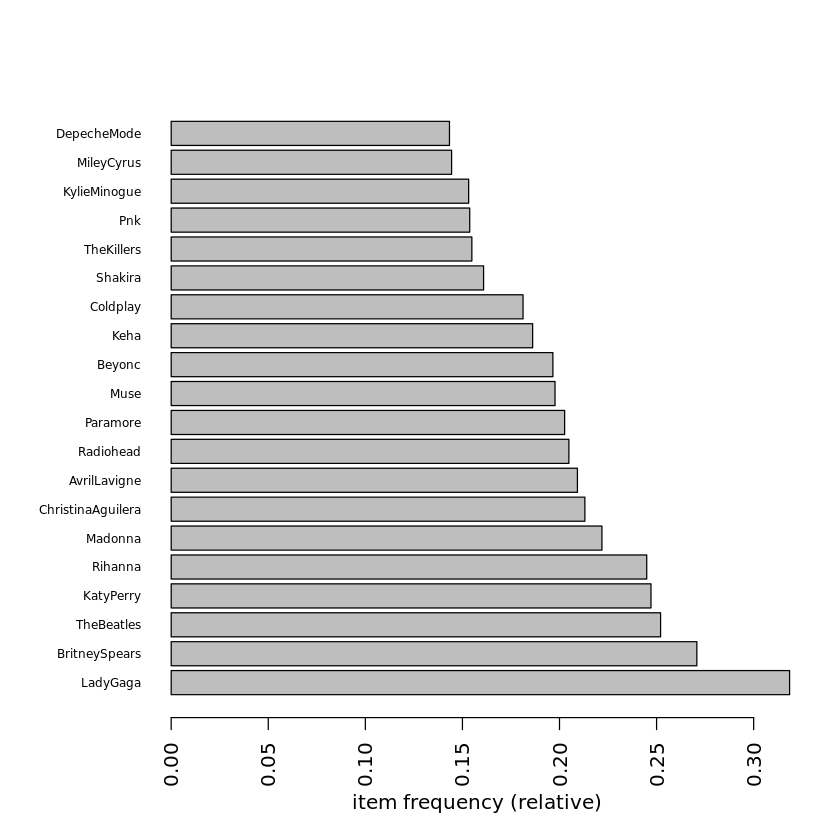

In [2]:
#Read in data, making sure the file is read with the transacation format
MUSIC <- read.transactions("musiclikesmod.csv", sep=",", format="basket")

#Look at the top 20 frequently appearing product_ids
itemFrequencyPlot(MUSIC, topN=20, type="relative", horiz=TRUE, cex.names=0.6)

## Question 1:

There are 2459 unique bands, though many are very rare.

a.  Back in 2011, some of my favorite bands were `TheCure`, `Rush`, `PinkFloyd`, and `DreamTheater`.

* What fraction of the 1821 listeners like `TheCure`?
* How many total listeners liked `DreamTheater`?
* What fraction liked at least one of `Rush` or `PinkFloyd`?

In [3]:
itemFrequency(MUSIC)["TheCure"]

itemFrequency(MUSIC)["DreamTheater"]*length(MUSIC)

SUB <- subset( MUSIC, items %in% c("Rush","PinkFloyd") )
length(SUB)/length(MUSIC)

mean( MUSIC %in% c("PinkFloyd","Rush") )

TheCure 
0.1092806

DreamTheater 
          67

[1] 0.1389347

[1] 0.1389347

**Grading:** 3 total, 1 each.

b.
* How many bands have at least 80 listeners (i.e., how many bands have a support at least 80/1821; it's a little less than 150)?
* If we considered ONLY rules of length 3 (If A and B, then C) with these bands, use the `choose` function to determine how many possible rules exist.

In [4]:
sum( itemFrequency(MUSIC) >= 80/length(MUSIC) )
length( which( itemFrequency(MUSIC) >= 80/length(MUSIC) ) )

[1] 147

[1] 147

In [5]:
choose(147, 3)

[1] 518665

In [6]:
choose(147, 3) * 3

[1] 1555995

**Grading:** 2 total, 1 each.

c.  Build a ruleset using this support (80/1821) and a minimum level of confidence of 60%.  Do not put any restrictions on the lengths of the rules.
Remove the `redundant` and keep only `significant` ones (there should be 19981 rules left-over), then print out the top 10 rules in terms of lift to the screen.
Hints: to remove the redundant and non-significant rules, please follow examples:
* RULES <- RULES[!is.redundant(RULES)]
* RULES <- RULES[is.significant(RULES, MUSIC)]

In [7]:
RULES <- apriori(MUSIC,
                 parameter = list(supp = 80/1821, conf = 0.60),
                 control = list(verbose = FALSE) )
RULES <- RULES[!is.redundant(RULES)]
RULES <- RULES[is.significant(RULES,MUSIC)]
length(RULES)
## [1] 19981
inspect( head( sort( RULES, by = "lift", decreasing = TRUE ), 10) )

[1] 19981

     lhs                    rhs                support confidence   coverage     lift count
[1]  {BritneySpears,                                                                       
      ChristinaAguilera,                                                                   
      KylieMinogue,                                                                        
      MariahCarey,                                                                         
      Rihanna}           => {JenniferLopez} 0.04448105  0.7232143 0.06150467 7.316518    81
[2]  {HilaryDuff,                                                                          
      Rihanna}           => {AshleyTisdale} 0.04448105  0.6480000 0.06864360 7.239313    81
[3]  {ChristinaAguilera,                                                                   
      KylieMinogue,                                                                        
      MariahCarey,                                                              

**Grading:**
1 pt.
If they botched setting up the ruleset, try to grade future problems based on how they set it up here.

d.
You should find that one of the top rules in terms of lift is `{HilaryDuff,Rihanna} => {AshleyTisdale}`.
81 listeners like this set of 3 artists.
* First, explain how can you get the number 81 from the support of the rule.
* Second, write a line of R code that produces this 81 by counting up the number of "transactions" that contain all 3 of these "items" (you'll need `length` and `which` along with `%ain%`).

In [8]:
0.04448105 * length(MUSIC)  #support times the number of transactions

length( MUSIC[ which(MUSIC %ain% c("HilaryDuff","Rihanna","AshleyTisdale") ) ] ) 

[1] 80.99999

[1] 81

**Grading:** 2 pt. total, 1 each.

e.  The rule `{HilaryDuff,Rihanna} => {AshleyTisdale}` has a confidence of 65%.
First, explain in English what the rule `{HilaryDuff,Rihanna} => {AshleyTisdale}` means.  Then, carefully interpret the confidence.

**Response:**

If a listener likes Hilary Duff and Rihanna, then they may also like Ashley Tisdale. The rule is correct 65% (confidence) of the time, i.e. 65% of listeners that like Hilary Duff and Rihanna also do like Ashley Tisdale.

There is an 65% chance that if a listener likes Hilary Duff and Rihanna, they will also like Ashley Tisdale.

A few others ways: 65% of carts with Hilary Duff and Rihanna also have Ashley.

**Grading:**

1 pt. total.
Quite a few ways can interpret the confidence. Any one is fine.

f.  The lift of the rule `{HilaryDuff,Rihanna} => {AshleyTisdale}` is about 7.2.  Interpret this value in two ways:

1)  by commenting on how often these bands appear together in users' lists of likes compared to lists generated when users pick bands at random

**Response:**

HilaryDuff, Rihanna, and AshleyTisdale appear together on lists 7.2 times more frequently than what we’d expect if listeners picked bands at random.

**Grading:**

2 pts.
This is pretty darn important.

2) by calculating and commenting on probabilities of finding `AshleyTisdale` before and after knowing that both `Rihanna` and `HilaryDuff` is in the list of likes (this interpretation requires using the value of the lift and the support of `AshleyTisdale`).

**Response:**

Knowing that Rihanna and HilaryDuff is in the list of likes increases the probability of finding AshleyTisdale from about 9% (its support/prior probability) by a factor of 7.2 to about 65% (the confidence/posterior probability).

**Grading:**

2 pts.
This is pretty darn important too.

g.  Using a single line of code, print to the screen the 3 rules that involve `Muse` or `ArcticMonkeys` in the consequent.

In [9]:
inspect( subset(RULES, rhs %in% c("Muse","ArcticMonkeys")) )

    lhs                      rhs             support    confidence coverage  
[1] {TheStrokes}          => {ArcticMonkeys} 0.06040637 0.6508876  0.09280615
[2] {Coldplay,TheKillers} => {Muse}          0.04557935 0.6240602  0.07303679
[3] {Coldplay,Radiohead}  => {Muse}          0.04722680 0.6187050  0.07633169
    lift     count
[1] 5.198536 110  
[2] 3.156704  83  
[3] 3.129616  86  


**Grading:**  1 pt.

h.  Remake the rules (call them `RULES.MINE`) so that the minimum support is 30/1821 (they have to apply to at least 30 listeners) and a minimum level of confidence of 0.25. Don't remove redundant/nonsignificant rules in this case.  Think of an artist (or artists) that you particularly liked back in 2011 (don't use one already studied) and see if any rules involved them on the left hand or right hand sides (do mind the spelling; special characters and spaces have been eliminated).  Print to the screen 5 of the rules, if any exist (they might not!).

In [10]:
RULES.MINE <- apriori(MUSIC,
                      parameter = list(supp = 30/1821, conf = 0.25),
                      control=list(verbose=FALSE))

In [11]:
inspect(
    head(
        subset(RULES.MINE, lhs %in% "TheCure" | rhs %in% "TheCure"),
        5)
)

    lhs              rhs       support    confidence coverage   lift     count
[1] {Morrissey}   => {TheCure} 0.01702361 0.5636364  0.03020319 5.157698 31   
[2] {PetShopBoys} => {TheCure} 0.01757276 0.3809524  0.04612850 3.486001 32   
[3] {aha}         => {TheCure} 0.02031851 0.4252874  0.04777595 3.891700 37   
[4] {DuranDuran}  => {TheCure} 0.02526085 0.4742268  0.05326744 4.339533 46   
[5] {NewOrder}    => {TheCure} 0.02745744 0.5617978  0.04887424 5.140873 50   


In [12]:
inspect(
    head(
        sort(
            subset(RULES.MINE, lhs %in% "TheCure" | rhs %in% "TheCure"),
            by="lift",
            decreasing=TRUE),
        5)
)

    lhs                      rhs           support    confidence coverage  
[1] {DepecheMode,TheCure} => {NewOrder}    0.02251510 0.4059406  0.05546403
[2] {DepecheMode,TheCure} => {DuranDuran}  0.02251510 0.4059406  0.05546403
[3] {TheCure,TheSmiths}   => {JoyDivision} 0.01757276 0.5000000  0.03514552
[4] {JoyDivision,TheCure} => {TheSmiths}   0.01757276 0.5714286  0.03075233
[5] {DepecheMode,TheCure} => {aha}         0.01757276 0.3168317  0.05546403
    lift     count
[1] 8.305818 41   
[2] 7.620802 41   
[3] 7.169291 32   
[4] 7.030888 32   
[5] 6.631615 32   


**Grading:**

2 pts.
Check the syntax for the subset (lhs or rhs). It might be the case that no rules exist! Everyone’s answers are likely to be different. Basically, checking to make sure the syntax is right regardless of output.

i.  Create `MUSIC2` and `RULES2` as follows, which contain association rules among more "obscure" bands (all users who listened to any of the top 20 most frequently listened to bands were eliminated).
Plot these rules with `set.seed(2018); plot(RULES2, method="graph", edgeCol = "black",cex=0.6, alpha=1)`

In [13]:
#MUSIC2 becomes the lists that do NOT contain any of the top 20 most frequently appearing bands
MUSIC2 <- MUSIC[ !(MUSIC %in% names( tail(sort(itemFrequency(MUSIC)), 20) )) ]
length(MUSIC2)

[1] 329

In [14]:
RULES2 <- apriori(MUSIC2,
                  parameter = list(supp = 15/235, conf = 0.5, maxlen=3),
                  control=list(verbose=FALSE))
RULES2 <- RULES2[!is.redundant(RULES2)]
RULES2 <- RULES2[is.significant(RULES2,MUSIC2)]
length(RULES2)

[1] 31

In [15]:
inspect(subset(RULES2,rhs %in% "BlackSabbath") )

    lhs                         rhs            support    confidence coverage  
[1] {JudasPriest}            => {BlackSabbath} 0.08510638 0.8235294  0.10334347
[2] {ACDC}                   => {BlackSabbath} 0.06686930 0.6875000  0.09726444
[3] {Motrhead}               => {BlackSabbath} 0.06382979 0.6176471  0.10334347
[4] {IronMaiden}             => {BlackSabbath} 0.09726444 0.5818182  0.16717325
[5] {IronMaiden,JudasPriest} => {BlackSabbath} 0.06990881 0.8518519  0.08206687
    lift     count
[1] 6.608321 28   
[2] 5.516768 22   
[3] 4.956241 21   
[4] 4.668736 32   
[5] 6.835592 23   


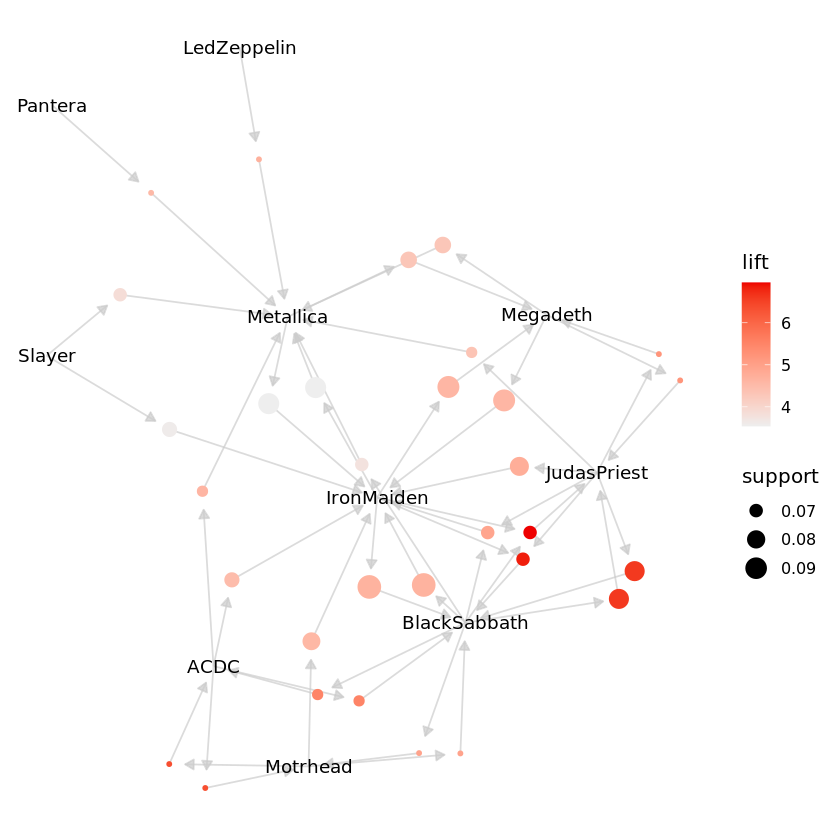

In [16]:
set.seed(2018); plot(RULES2, method="graph")

Turns out these are associations between rock and metal bands!  What's interesting though is that the likes tend to come in clusters.  If you don't know much about this type of music, you might think that "all types of metal are the same".  Is it though?  The graph makes this clear, and this might not have been apparent from scanning the list of rules.

* Do listeners of Metallica tend to listen to Iron Maiden (and vice versa)?  Yes or No, and how do you know?

* **Response:** Yes, you can see them connected in the graph, and there are rules connecting them in both directions (with a lift of 3.54)

* Do listeners of Megadeth tend to listen to Black Sabbath or ACDC (and vice versa)?  Yes or No, and how do you know?

* **Response:** No. They are not connected in the graph, and there aren’t rules connecting these bands.

**Grading:**

1 pt.
There’s a reasonable chance that arulesViz wouldn’t work on the students’ laptop. In that case, it’s fine if they take the plot someone else made and pasted it into their Word document. The interpretation is actually pretty interesting.

## Conceptual Question 2:

Imagine that during the course of a market basket analysis that you find one item (for illustration, say it's granola bars) is the consequent of dozens of rules, but it never appears as an antecedent.  In other words, we see rules like cereal+coffee -> granola bars, but never rules like granola bars -> item.  What we might we do with this information?  One thing we could do is place granola bars strategically around the store near items involved in the rules in order to "prompt" people to buy them (I know my Food City has bananas in "random" places it seems, and maybe this explains why).

If we want to use these association rules to increase sales at the store, which course of action (or do both?) makes more sense based on the data and why:

a)  discounting granola bars (with the hopes of increasing the sales of the dozens of products involved in these rules)

b)  having a promotion where you get a 25-cents off coupon for granola bars when you buy any of products that appear in the antecedent of the rules

**Response:**

Only (b). Discounting granola bars won’t help drive sales of other products because we gain no additional knowledge of what might else often is found in a cart given that granola bars are in the cart (all the rules are of the form “If x and y are in the cart, then granola bars may be in the cart as well”. Rather, offering the 25 cents off promotion makes more sense. When people have x and y in the cart, very often they end up buying granola bars. Maybe with a 25 cents off promotion people who are on the fence might end up buying them.
The tricky thing is not to make the discount TOO big, because a lot of these people are going to be buying granola bars anyway and you’d be throwing away money.

**Grading:**

1 pts.
They don’t need to go in as much detail as I do here, but the gist of the answer needs to be correct. They key thing is that only (b) makes sense based on the data.

## Conceptual Question 3:

Unfortunately, the sizes of the three quality measures for association rules (support, confidence, and lift) don't have any *intrinsic* importance:  bigger isn't always more interesting.  In other words, sometimes a large confidence is interesting, sometimes it's not.  Sometimes a large lift is interesting, sometimes it's not, etc.

a.  It is found that the rule { A, B } -> { C } has a confidence of 1 and a support of 0.12.  At first glance this sounds impressive:  12% of carts have items A, B, and C in them, and *every* time A and B are in a cart, we also find item C.  However, think of a scenario where a rule that has 100% confidence has absolutely no practical consequence.  Hint:  think about the support of C.

**Response:**

If item C has a support of 1, i.e., is in every cart, then every rule where C is the consequent will have a confidence of 100%. These rules would tell us nothing that we don’t already know (that C is always purchased).

**Grading:** 1 pt.

b.  Normally, a lift of 1.25 does not get much attention because it is so close to 1.  However, think of a scenario (i.e., a number for the overall fraction of carts with item B in it) where the rule { A } -> { B } having a lift of 1.25 would imply that item B is in the cart with 100% certainty when item A is there.

**Response:**

If item B has a support of 0.8, then a lift of 1.25 would mean that the the probability of finding B in a cart that has A has increased by a factor of 1.25. But 0.8*1.25 = 1, so basically if the item A is there, we know with 100% certainty that item B will be there, even though this rule has a small lift. That’s pretty useful.

**Grading:** 1 pt.

## Extra Discussion

It turns out that not so many bands are the consequent of the rules that were discovered.
Thus, there's not much room here for developing a "recommendation engine".
We could recommend few bands based on the list of user's likes.

In [17]:
rhs.matrix <- as(rhs(RULES), 'matrix')

# how many items in each rule?
table(rowSums(rhs.matrix))

# how many rules each item appears in?
table(colSums(rhs.matrix))

# find out the few popular items:
rhs.frequency <- colSums(rhs.matrix)
rhs.frequency[rhs.frequency>0]


    1 
19981 


   0    1    2    5    6   37   64  110  293  362  693  815  871  978 1066 1093 
2434    1    2    2    1    1    1    1    1    1    1    1    1    1    1    1 
1197 1227 1324 1543 1790 1858 2126 2513 
   1    1    1    1    1    1    1    1 

ArcticMonkeys     AshleyTisdale      AvrilLavigne            Beyonc 
                1                 5              1197              2126 
    BlackEyedPeas     BritneySpears ChristinaAguilera     JenniferLopez 
             1093              1858              2513                64 
        KatyPerry              Keha     KellyClarkson      KylieMinogue 
             1543              1324               110               693 
         LadyGaga           Madonna       MariahCarey        MileyCyrus 
             1066               871               293               815 
             Muse          Paramore               Pnk         Radiohead 
                2                 6               978                 2 
          Rihanna           Shakira       TaylorSwift        TheBeatles 
             1790              1227                37                 5 
 ThePussycatDolls 
              362